In [252]:
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
iris_dataset = load_iris()
data = iris_dataset['data']
labels = iris_dataset['target']
var_names = iris_dataset['feature_names']
target_names = iris_dataset['target_names']

In [253]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)

view.shape

(150, 2)

Text(0, 0.5, 'PCA-2')

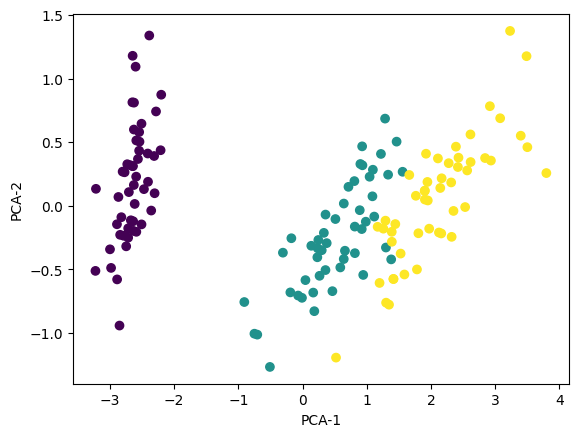

In [254]:
plt.scatter(view[:,0], view[:,1], c=labels)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

А КАК ВООБЩЕ РАБОТАЕТ PCA - PRINCIPAL COMPONENT ANALYSIS 

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.         11.         12.        ]
 [-0.1421974   2.93741079  6.60625475  9.5162651  10.60311347 15.93824746
  14.47803911 13.29868572 21.02025962 19.55727855 22.97043807 24.97921576]]


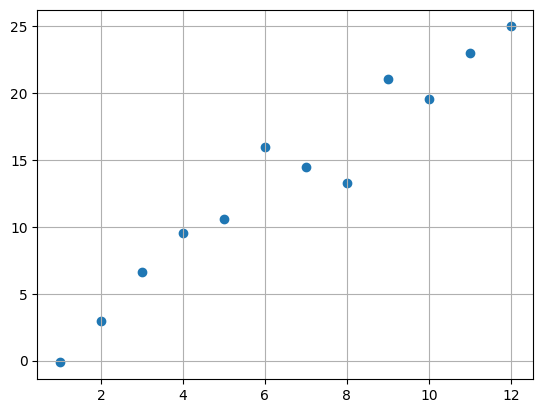

In [255]:
x = np.arange(1, 13)
y = 2 * x + np.random.randn(12)*1.5
X = np.vstack((x, y))
print(X)
plt.grid()
plt.scatter(x, y)

(6.5, 13.4802509177954)


(-15.622448314793775, 13.498964844676221)

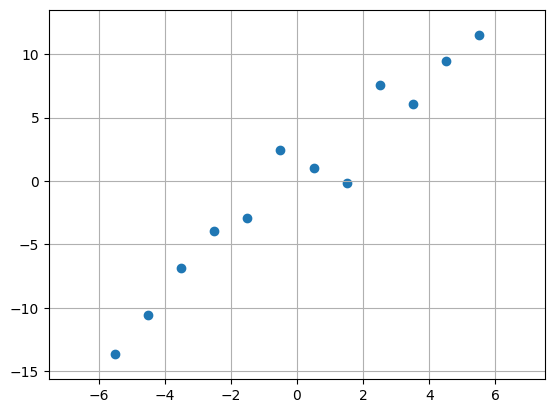

In [256]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(m)
plt.grid(True)
plt.scatter(Xcentered[0], Xcentered[1])
plt.xlim(Xcentered[0].min()-2, Xcentered[0].max()+2)
plt.ylim(Xcentered[1].min()-2, Xcentered[1].max()+2)


В случае с многомерной случайной величиной (случайным вектором) положение центра все так же будет являться мат. ожиданиями ее проекций на оси. А вот для описания ее формы уже недостаточно толькое ее дисперсий по осям. Посмотрите на эти графики, у всех трех случайных величин одинаковые мат.ожидания и дисперсии, а их проекции на оси в целом окажутся одинаковы!

numpy.cov(X). Она принимает на вход список всех признаков случайной величины и возвращает ее ковариационную матрицу и где X – n-мерный случайный вектор (n-количество строк). Функция отлично подходит и для расчета несмещенной дисперсии, и для ковариации двух величин, и для составления ковариационной матрицы.
c[i][j] - ковариация элементов i j
с[i][i] - дисперсия i i 
Матрица симметрична!!!
Если величина элемента c_ij высока, это означает, что переменные x_i и x_j очень сильно связаны
Cобственные значения и собственные векторы CM указывают направление максимального разброса данных.

In [257]:
covmat = np.cov(Xcentered)
print(covmat)
print('Variance of  X:', covmat[0 ,0])
print('variance of Y:', covmat[1,1])
print('covariance of X and Y:', covmat[0,1])


[[13.         27.79256536]
 [27.79256536 62.82796706]]
Variance of  X: 13.0
variance of Y: 62.82796706061276
covariance of X and Y: 27.79256535642455


Собственные вектора и значения (айгенпары)
в английском языке собственные значения и векторы именуются eigenvalues и eigenvectors соответственно.
еперь надо найти такой вектор (в нашем случае только один), при котором максимизировался бы размер (дисперсия) проекции нашей выборки на него
Обобщение дисперсии на высшие размерности — ковариационная матрица, и эти два понятия эквивалентны. При проекции на вектор максимизируется дисперсия проекции, при проекции на пространства больших порядков – вся ее ковариационная матрица.
Mx = lymbda * x
!!!Таким образом, направление максимальной дисперсии у проекции всегда совпадает с айгенвектором, имеющим максимальное собственное значение, равное величине этой дисперсии.!!!
Размерность нашей выборки равна двум и количество айгенвекторов у нее, соответственно, 2.

И это справедливо также для проекций на большее количество измерений – дисперсия (ковариационная матрица) проекции на m-мерное пространство будет максимальна в направлении m айгенвекторов, имеющих максимальные собственные значения.

В библиотеке numpy реализована функция numpy.linalg.eig(X), где X – квадратная матрица. Она возвращает 2 массива – массив айгензначений и массив айгенвекторов (векторы-столбцы)

In [258]:
eigenvalues, eigenvectors = np.linalg.eig(covmat)
print(f'Вектор собственных значений: \n {eigenvalues}')
print(f'Собственные вектора(по столбцам): \n {eigenvectors}')

Вектор собственных значений: 
 [ 0.58928307 75.23868399]
Собственные вектора(по столбцам): 
 [[-0.91309725 -0.40774183]
 [ 0.40774183 -0.91309725]]


И векторы нормированы — их длина равна 1. Как раз то, что надо. Эти 2 вектора задают новый базис для выборки, такой что его оси совпадают с полуосями аппроксимирующего эллипса нашей выборки.

In [259]:
print(eigenvectors[:, 1])

[-0.40774183 -0.91309725]


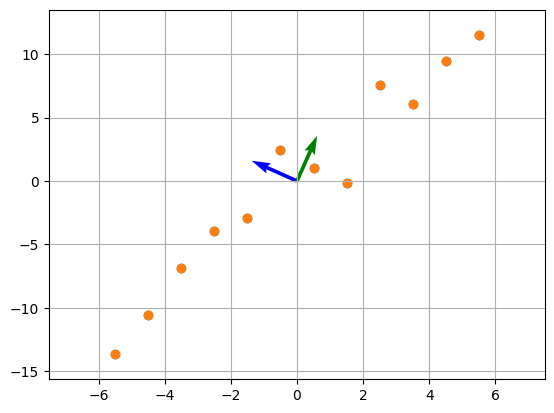

In [260]:
plt.grid(True)
plt.scatter(Xcentered[0], Xcentered[1])
plt.scatter(Xcentered[0], Xcentered[1])
plt.xlim(Xcentered[0].min()-2, Xcentered[0].max()+2)
plt.ylim(Xcentered[1].min()-2, Xcentered[1].max()+2)

coordinates = np.array([eigenvectors[:,0],  -eigenvectors[:,1] ])
o = np.array([[0, 0], [0, 0]])
plt.quiver(*o, coordinates[:, 0], coordinates[:, 1], color=["blue", "green"], scale=10)

 Диагональные элементы ковариационной матрицы показывают дисперсии по изначальному базису, а ее собственные значения – по новому (по главным компонентам).

Для проведения проекции, как уже упоминалось ранее на шаге 3, надо провести операцию vTX (вектор должен быть длины 1). Или, если у нас не один вектор, а гиперплоскость, то вместо вектора vT берем матрицу базисных векторов VT. Полученный вектор (или матрица) будет являться массивом проекций наших наблюдений.


In [261]:
_, eigenvectors = np.linalg.eig(covmat)
v2 = -eigenvectors[:, 1]
Xnew = np.dot(v2,Xcentered)
print(Xnew)

[-14.68120025 -11.46147663  -7.70372345  -4.63885915  -3.23871905
   2.04051897   1.11494858   0.44582607   7.90411583   6.97601366
  10.50030209  12.74225332]


Восстановление данных

У нас есть вся необходимая информация, а именно координаты базисных векторов в исходном базисе (векторы, на которые мы проецировали) и вектор средних (для отмены центровки). Возьмем, к примеру, наибольшее значение: 10.596… и раскодируем его. Для этого умножим его справа на транспонированный вектор и прибавим вектор средних, или в общем виде для всей выборки: XTvT+m

In [262]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v2) + m
print( 'Restored: ', Xrestored)
print( 'Original: ', X[:,n])

Restored:  [ 9.3444126  19.85002985]
Original:  [10.         19.55727855]


Разница небольшая, но она есть. Ведь потерянная информация не восстанавливается. Тем не менее, если простота важнее точности, восстановленное значение отлично аппроксимирует исходное.

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет. Другими словами – это n айгенвекторов с самыми большими собственными числами. Проверим результат снижения размерности:

In [264]:
print(f'our reduce X: \n {Xnew}')
print(f'Sclearn reduce: \n {XPCAreduced}')

our reduce X: 
 [-14.68120025 -11.46147663  -7.70372345  -4.63885915  -3.23871905
   2.04051897   1.11494858   0.44582607   7.90411583   6.97601366
  10.50030209  12.74225332]
Sclearn reduce: 
 [[ 14.68120025]
 [ 11.46147663]
 [  7.70372345]
 [  4.63885915]
 [  3.23871905]
 [ -2.04051897]
 [ -1.11494858]
 [ -0.44582607]
 [ -7.90411583]
 [ -6.97601366]
 [-10.50030209]
 [-12.74225332]]


Сравним полученные результаты 

In [265]:
print( 'Mean vector: ', pca.mean_, m)
print( 'Projection: ', pca.components_, v2)
print( 'Explained variance ratio: ', pca.explained_variance_ratio_) # коэффициент дисперсии

Mean vector:  [ 6.5        13.48025092] (6.5, 13.4802509177954)
Projection:  [[-0.40774183 -0.91309725]] [0.40774183 0.91309725]
Explained variance ratio:  [0.99222868]
